In [52]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt


In [53]:
# Load dataset
file_path = "diabetes_prediction_dataset_new.csv"  
df = pd.read_csv(file_path)


In [54]:
print(df['smoking_history'].unique())  


['never' 'No Info' 'current' 'former' 'not current' 'ever']


In [55]:

df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})

#df['smoking_history'] = df['smoking_history'].replace("No Info", np.nan)
#df['smoking_history'] = df['smoking_history'].fillna('Unknown')
#df['smoking_history'] = df.groupby('heart_disease')['smoking_history'].transform(lambda x: x.fillna(x.mean()))

#df['smoking_history'].isnull().sum()
mapping = {
    "never": 0,
    "current": 1,
    "former": 2,
    "not current": 3,
    "ever": 4,
    "No Info": np.nan
}
df['smoking_history'] = df['smoking_history'].str.strip().map(mapping)
print(df['smoking_history'].isnull().sum())  # Count missing values

df.loc[(df['heart_disease'] == 1) & (df['smoking_history'].isnull()), 'smoking_history'] = 1  # 'current' smoker
df.loc[(df['heart_disease'] == 0) & (df['smoking_history'].isnull()), 'smoking_history'] = 0  # 'never' smoker

# One-hot encode 
df = pd.get_dummies(df, columns=['smoking_history'], prefix="smoking_history")
column_mapping = {
    "smoking_history_0.0": "smoking_history_never",
    "smoking_history_1.0": "smoking_history_current",
    "smoking_history_2.0": "smoking_history_former",
    "smoking_history_3.0": "smoking_history_not_current",
    "smoking_history_4.0": "smoking_history_ever",

}

df.rename(columns=column_mapping, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
df



 


35816


,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_never,smoking_history_current,smoking_history_former,smoking_history_not_current,smoking_history_ever
0,0,80,0,1,25,6,140,0,1,0,0,0,0
1,0,54,0,0,27,6,80,0,1,0,0,0,0
2,1,28,0,0,27,5,158,0,1,0,0,0,0
3,0,36,0,0,23,5,155,0,0,1,0,0,0
4,1,76,1,1,20,4,155,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,80,0,0,27,6,90,0,1,0,0,0,0
99996,0,2,0,0,17,6,100,0,1,0,0,0,0
99997,1,66,0,0,27,5,155,0,0,0,1,0,0
99998,0,24,0,0,35,4,100,0,1,0,0,0,0


In [56]:
scaler_standard = StandardScaler()
standard_cols = ['blood_glucose_level', 'HbA1c_level']
df[standard_cols] = scaler_standard.fit_transform(df[standard_cols])
df[standard_cols]


,blood_glucose_level,HbA1c_level
0,0.047704,0.787897
1,-1.426210,0.787897
2,0.489878,-0.120279
3,0.416183,-0.120279
4,0.416183,-1.028455
...,...,...
99995,-1.180558,0.787897
99996,-0.934905,0.787897
99997,0.416183,-0.120279
99998,-0.934905,-1.028455


In [57]:
bmi_means = df.groupby(['gender', 'age'])['bmi'].mean().to_dict()


df['bmi'] = df.apply(lambda row: bmi_means.get((row['gender'], row['age']), row['bmi']) 
                      if row['bmi'] == 27.32 else row['bmi'], axis=1)


In [58]:
scaler_minmax = MinMaxScaler()
minmax_cols = ['bmi', 'age']
df[minmax_cols] = scaler_minmax.fit_transform(df[minmax_cols])
df[minmax_cols]

,bmi,age
0,0.176471,1.0000
1,0.200000,0.6750
2,0.200000,0.3500
3,0.152941,0.4500
4,0.117647,0.9500
...,...,...
99995,0.200000,1.0000
99996,0.082353,0.0250
99997,0.200000,0.8250
99998,0.294118,0.3000


In [59]:
df.describe()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_never,smoking_history_current,smoking_history_former,smoking_history_not_current,smoking_history_ever
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000
mean,0.414300,0.523446,0.07485,0.039420,0.198524,4.078515e-17,-2.786749e-16,0.085000,0.699940,0.102090,0.093520,0.06447,0.039980
std,0.492603,0.281693,0.26315,0.194593,0.078141,1.000005e+00,1.000005e+00,0.278883,0.458286,0.302768,0.291161,0.24559,0.195913
min,0.000000,0.000000,0.00000,0.000000,0.000000,-1.936630e+00,-1.426210e+00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.300000,0.00000,0.000000,0.152941,-1.028455e+00,-9.349053e-01,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.537500,0.00000,0.000000,0.200000,-1.202788e-01,4.770422e-02,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000
75%,1.000000,0.750000,0.00000,0.000000,0.223529,7.878970e-01,5.144437e-01,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,3.512424e+00,3.978142e+00,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [60]:


values = {}
for col in ['bmi', 'age', 'blood_glucose_level']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    values[col] = (Q1, Q3)

values
   
 

{'bmi': (np.float64(0.15294117647058822), np.float64(0.2235294117647059)),
 'age': (np.float64(0.30000000000000004), np.float64(0.75)),
 'blood_glucose_level': (np.float64(-0.9349052544728024),
  np.float64(0.5144437142842841))}

In [61]:
IQR = Q3 - Q1
IQR  

np.float64(1.4493489687570866)

In [62]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound,upper_bound

(np.float64(-3.1089287076084324), np.float64(2.688467167419914))

In [63]:
q1_q3_bounds = {}
for col in ['bmi', 'age', 'blood_glucose_level']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    q1_q3_bounds[col] = {"Q1": Q1, "Q3": Q3, "Lower Bound": lower_bound, "Upper Bound": upper_bound}

q1_q3_bounds

{'bmi': {'Q1': np.float64(0.15294117647058822),
  'Q3': np.float64(0.2235294117647059),
  'Lower Bound': np.float64(0.04705882352941171),
  'Upper Bound': np.float64(0.3294117647058824)},
 'age': {'Q1': np.float64(0.30000000000000004),
  'Q3': np.float64(0.75),
  'Lower Bound': np.float64(-0.3749999999999999),
  'Upper Bound': np.float64(1.4249999999999998)},
 'blood_glucose_level': {'Q1': np.float64(-0.9349052544728024),
  'Q3': np.float64(0.5144437142842841),
  'Lower Bound': np.float64(-3.1089287076084324),
  'Upper Bound': np.float64(2.688467167419914)}}

In [64]:
for col in ['bmi', 'age', 'blood_glucose_level']:
     df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
     df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
df
   

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_never,smoking_history_current,smoking_history_former,smoking_history_not_current,smoking_history_ever
0,0,1.0000,0,1,0.176471,0.787897,0.047704,0,1,0,0,0,0
1,0,0.6750,0,0,0.200000,0.787897,-1.426210,0,1,0,0,0,0
2,1,0.3500,0,0,0.200000,-0.120279,0.489878,0,1,0,0,0,0
3,0,0.4500,0,0,0.152941,-0.120279,0.416183,0,0,1,0,0,0
4,1,0.9500,1,1,0.117647,-1.028455,0.416183,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,1.0000,0,0,0.200000,0.787897,-1.180558,0,1,0,0,0,0
99996,0,0.0250,0,0,0.082353,0.787897,-0.934905,0,1,0,0,0,0
99997,1,0.8250,0,0,0.200000,-0.120279,0.416183,0,0,0,1,0,0
99998,0,0.3000,0,0,0.294118,-1.028455,-0.934905,0,1,0,0,0,0


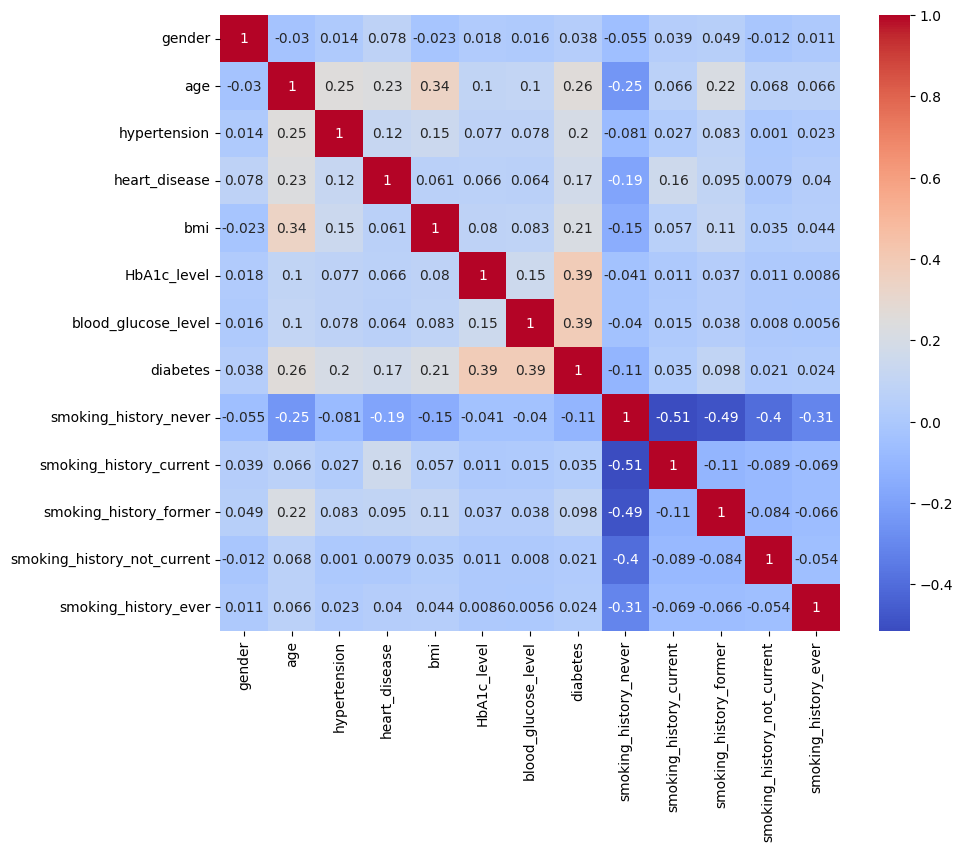

In [65]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()



In [66]:
X = df.drop(columns=['diabetes'])
y = df['diabetes']
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)



Selected Features: Index(['age', 'hypertension', 'bmi', 'HbA1c_level', 'blood_glucose_level'], dtype='object')


In [75]:
# 6. Train-Test Splitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Class distribution in train. :", np.bincount(y_train))


Class distribution in train. : [73200  6800]


In [68]:
X_train.shape


(80000, 12)

In [69]:
X_test.shape


(20000, 12)

In [70]:
y_train.shape


(80000,)

In [71]:
y_test.shape

(20000,)

In [72]:


# Save cleaned dataset
df.to_csv("diabetes_preprocessed.csv", index=False)
print("Preprocessing completed and dataset saved as: diabetes_preprocessed.csv")


Preprocessing completed and dataset saved as: diabetes_preprocessed.csv


In [73]:
df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_never,smoking_history_current,smoking_history_former,smoking_history_not_current,smoking_history_ever
0,0,1.0000,0,1,0.176471,0.787897,0.047704,0,1,0,0,0,0
1,0,0.6750,0,0,0.200000,0.787897,-1.426210,0,1,0,0,0,0
2,1,0.3500,0,0,0.200000,-0.120279,0.489878,0,1,0,0,0,0
3,0,0.4500,0,0,0.152941,-0.120279,0.416183,0,0,1,0,0,0
4,1,0.9500,1,1,0.117647,-1.028455,0.416183,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,1.0000,0,0,0.200000,0.787897,-1.180558,0,1,0,0,0,0
99996,0,0.0250,0,0,0.082353,0.787897,-0.934905,0,1,0,0,0,0
99997,1,0.8250,0,0,0.200000,-0.120279,0.416183,0,0,0,1,0,0
99998,0,0.3000,0,0,0.294118,-1.028455,-0.934905,0,1,0,0,0,0
